In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

import sys
sys.path.insert(0, '../src/')
from pca import PCA_calcV,PCA_transform

In [2]:
standard_scaler = StandardScaler()

# define a tool to flatten and standardize x data into 2D in order to fit in sklearn
def flat_and_standard_x(x_data):
    sampnum, xax, yax, rgb = x_data.shape
    flattened_x = x_data.reshape(sampnum, xax*yax*rgb)
    f_s_x = standard_scaler.fit_transform(flattened_x)
    return f_s_x

In [3]:
# a tool to get train and test data for x and y
def getdata(trailnum):
    
    # importing data according to input trail number
    x_train_temp = np.load('../data/x_train_' + trailnum +'.npy')
    y_train = np.load('../data/y_train_' + trailnum +'.npy')
    x_test_temp = np.load('../data/x_test_' + trailnum +'.npy')
    y_test = np.load('../data/y_test_' + trailnum +'.npy')
    
    # use flatten_x to turn x data into 2D array
    x_train = flat_and_standard_x(x_train_temp)
    x_test = flat_and_standard_x(x_test_temp)
    
    return x_train, y_train, x_test, y_test

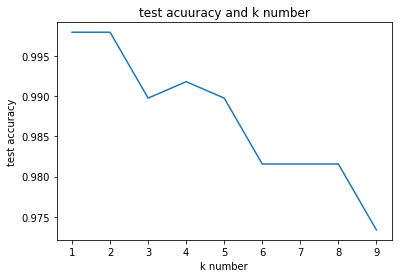

In [23]:
# randomly pick a dataset for testing best k number
x_train1,y_train1,x_test1,y_test1 = getdata('5')

# create empty acc_test array to store acc
acc_test = []

# try k from 1 to 10
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1,y_train1)
    pred = knn.predict(x_test1)
    acc = metrics.accuracy_score(pred, y_test1)
    acc_test.append(acc)
    
acc_test_np = np.array(acc_test)

# plot visualization
plt.plot(range(1,10),acc_test_np)
plt.ylabel("test accuracy")
plt.xlabel("k number")
plt.title("test acuuracy and k number")
plt.show()

In [6]:
# run knn with sklearn with input data
def knnwithsklearn(x_train,y_train,x_test,y_test):
    
    # implement knn using sklearn
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(x_train, y_train)
    
    # predict y values according to x test
    y_predict = knn.predict(x_test)
    y_train_predict = knn.predict(x_train)
    
    # calculate accuracy of this trail
    acc = metrics.accuracy_score(y_predict, y_test)
    
    print("accuracy of this trail without pca is "+ str(acc))
    
    return y_train_predict, y_predict

In [7]:
# run knn with sklearn with pca transformed input data
def knnwithsk_pca(x_train,y_train,x_test,y_test):
    
    vecs = PCA_calcV(2,x_train)
    x_pca_train = PCA_transform(vecs,x_train)
    x_pca_test = PCA_transform(vecs,x_test)
    
    # implement knn using sklearn
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(x_pca_train, y_train)
    
    # predict y values according to x test
    y_predict = knn.predict(x_pca_test)
    y_train_predict = knn.predict(x_pca_train)
    
    # calculate accuracy of this trail
    acc = metrics.accuracy_score(y_predict, y_test)
    
    plot_decision_regions(x_pca_train,y_train,clf = knn, 
                      legend = 4)
    plt.title('Knn decision boundary of this trial')
    plt.show()
    
    print("accuracy of this trail with pca is "+ str(acc))
    
    return y_train_predict, y_predict

accuracy of this trail without pca is 1.0


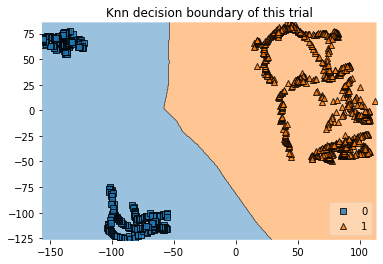

accuracy of this trail with pca is 1.0


In [8]:
x_train1,y_train1,x_test1,y_test1 = getdata('1')
y_tr_pred1, y_pred1 = knnwithsklearn(x_train1,y_train1,x_test1,y_test1)
y_pcatr_pred1, y_pca_pred1 = knnwithsk_pca(x_train1,y_train1,x_test1,y_test1)

accuracy of this trail without pca is 0.9176829268292683


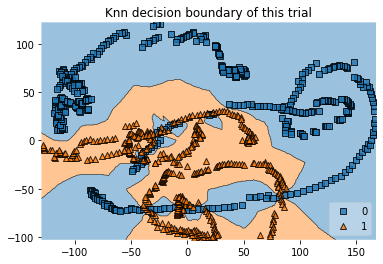

accuracy of this trail with pca is 0.7347560975609756


In [9]:
x_train1,y_train1,x_test1,y_test1 = getdata('2')
y_tr_pred1, y_pred1 = knnwithsklearn(x_train1,y_train1,x_test1,y_test1)
y_pcatr_pred1, y_pca_pred1 = knnwithsk_pca(x_train1,y_train1,x_test1,y_test1)

accuracy of this trail without pca is 1.0


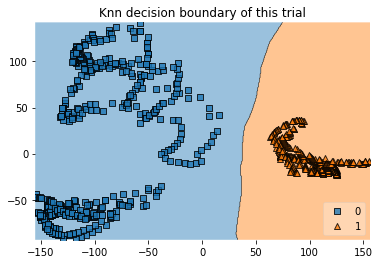

accuracy of this trail with pca is 1.0


In [10]:
x_train1,y_train1,x_test1,y_test1 = getdata('3')
y_tr_pred1, y_pred1 = knnwithsklearn(x_train1,y_train1,x_test1,y_test1)
y_pcatr_pred1, y_pca_pred1 = knnwithsk_pca(x_train1,y_train1,x_test1,y_test1)

accuracy of this trail without pca is 1.0


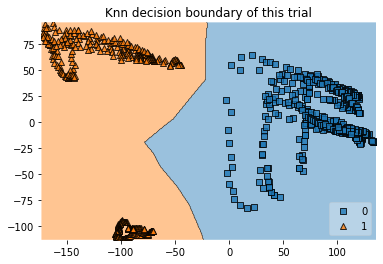

accuracy of this trail with pca is 1.0


In [12]:
x_train1,y_train1,x_test1,y_test1 = getdata('4')
y_tr_pred1, y_pred1 = knnwithsklearn(x_train1,y_train1,x_test1,y_test1)
y_pcatr_pred1, y_pca_pred1 = knnwithsk_pca(x_train1,y_train1,x_test1,y_test1)

accuracy of this trail without pca is 0.9979508196721312


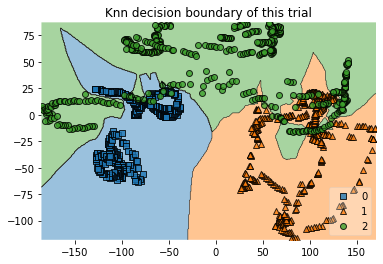

accuracy of this trail with pca is 0.8237704918032787


In [13]:
x_train1,y_train1,x_test1,y_test1 = getdata('5')
y_tr_pred1, y_pred1 = knnwithsklearn(x_train1,y_train1,x_test1,y_test1)
y_pcatr_pred1, y_pca_pred1 = knnwithsk_pca(x_train1,y_train1,x_test1,y_test1)